# Лабораторная работа 1

Выполнил студент гр.6231-010402D Соколов Р.А.

Задания:

1) Классификация данных методом k ближайших соседей (kNN) - выполнено

2) Классификация данных методом опорных векторов (SVM) - пропущено

3) Построение softmax-классификатора - выполнено

Вариант 3: задания 1 и 3 на наборе данных CIFAR-10

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scripts.data_utils import load_CIFAR10

from typing import Callable, Optional


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
warnings.filterwarnings('ignore')
np.random.seed(42)

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [15]:
cifar10_dir = '../lab_1-2/scripts/datasets/cifar-10-batches-py'

try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



In [4]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

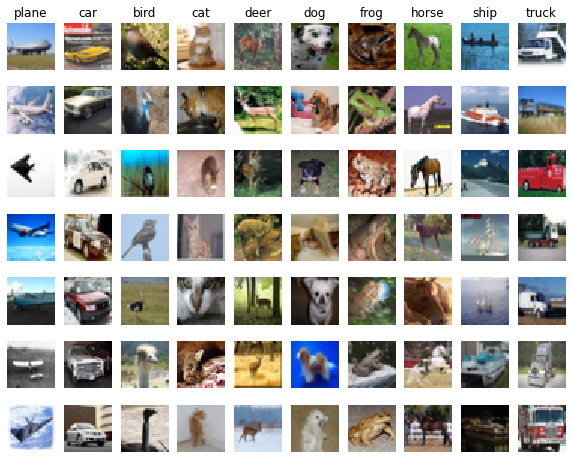

In [10]:
mapping_labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
n_classes = len(mapping_labels)
n_samples = 7

for class_index, class_name in enumerate(mapping_labels):
    class_indexes = np.random.choice(np.flatnonzero(y_train == class_index), n_samples, replace=False)
    for i, idx in enumerate(class_indexes):
        plt_idx = i * n_classes + class_index + 1
        plt.subplot(n_samples, n_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(class_name)
plt.show()

1.3 Разделите данные на обучающую и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [26]:
num_train = 5000
train_mask = range(num_train)
knn_X_train = X_train[train_mask]
knn_y_train = y_train[train_mask]

num_test = 500
test_mask = range(num_test)
knn_X_test = X_test[test_mask]
knn_y_test = y_test[test_mask]

In [27]:
knn_X_train = np.reshape(knn_X_train, (knn_X_train.shape[0], -1))
knn_y_train = np.reshape(knn_y_train, (knn_y_train.shape[0],))
knn_X_test = np.reshape(knn_X_test, (knn_X_test.shape[0], -1))
knn_y_test = np.reshape(knn_y_test, (knn_y_test.shape[0],))
print(knn_X_train.shape, knn_X_test.shape)

(5000, 3072) (500, 3072)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [28]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(knn_X_train, knn_y_train)

1.5 Выполните классификацию на тестовой выборке

In [30]:
knn_dists = classifier.compute_distances_two_loops(knn_X_test)

100%|█████████████████████████████████████████| 500/500 [00:15<00:00, 32.69it/s]


In [31]:
knn_dists.shape

(500, 5000)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


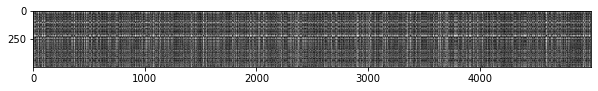

In [32]:
plt.imshow(knn_dists, interpolation='none')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [33]:
def accuracy(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.sum(y_pred == y_true) / np.sum(y_true.shape)

In [34]:
knn_y_test_predicts = classifier.predict_labels(knn_dists)
print(f"Accuracy: {accuracy(knn_y_test_predicts, knn_y_test)}")

100%|███████████████████████████████████████| 500/500 [00:00<00:00, 3209.76it/s]

Accuracy: 0.274


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [35]:
k_list = range(1, 21)
accuracy_list = []

for k in k_list:
    y_preds = classifier.predict(knn_X_test, k=k, num_loops=2)
    accuracy_list.append(accuracy(y_preds, knn_y_test))

100%|███████████████████████████████████████| 500/500 [00:00<00:00, 3633.59it/s]


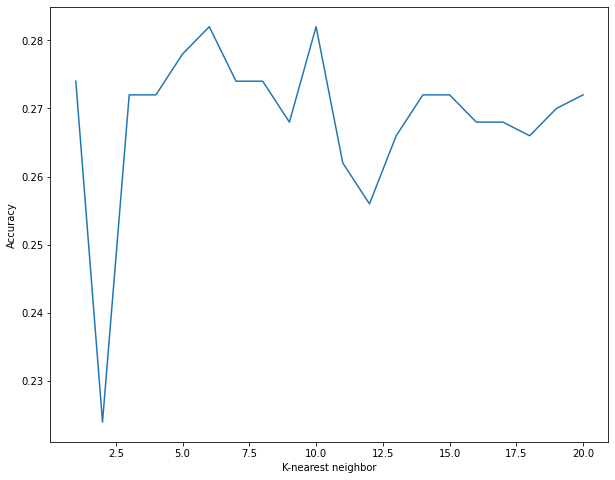

In [45]:
plt.plot(k_list, accuracy_list)
plt.xlabel("K-nearest neighbor")
plt.ylabel("Accuracy")
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [37]:
k_choices = [1, 2, 3, 4, 5, 10, 20, 50, 75, 100]
print(f"Выборка соседей: {k_choices}")

Выборка соседей: [1, 2, 3, 4, 5, 10, 20, 50, 75, 100]


In [40]:
def cross_val_score(
        estimator,
        X: np.ndarray,
        y: np.ndarray,
        k_folds: int = 5,
        scoring: Optional[Callable[[np.ndarray, np.ndarray], float]] = accuracy,
        estimator_params: Optional[dict] = None,
        train_estimator_params: Optional[dict] = None,
        prediction_estimator_params: Optional[dict] = None,
        verbose: int = 1,
) -> np.ndarray:
    y_folds = np.array_split(y, k_folds)
    X_folds = np.array_split(X, k_folds)

    accuracies = np.zeros((len(y_folds),))

    if verbose > 1:
        print(40 * "=")
        print(f"Cross validation for {estimator.__name__}")
        print(40 * "=")
    for fold in range(len(y_folds)):
        if verbose > 1:
            print(40 * "=")
            print(f"Fold: {fold}")

        y_train_fold = y_folds
        X_train_fold = X_folds

        y_test_fold = y_train_fold[fold]
        X_test_fold = X_train_fold[fold]

        X_train_elements = []
        y_train_elements = []

        for i, element in enumerate(zip(X_folds, y_folds)):
            if i != fold:
                X_train_elements.append(element[0])
                y_train_elements.append(element[1])

        y_train_fold = np.hstack(y_train_elements)
        X_train_fold = np.vstack(X_train_elements)

        if estimator_params:
            estimator_ = estimator(**estimator_params)
        else:
            estimator_ = estimator()

        if train_estimator_params:
            estimator_.train(X_train_fold, y_train_fold, **train_estimator_params)
        else:
            estimator_.train(X_train_fold, y_train_fold)

        if prediction_estimator_params:
            fold_y_pred = estimator_.predict(X_test_fold, **prediction_estimator_params)
        else:
            fold_y_pred = estimator_.predict(X_test_fold)

        if verbose > 1:
            print(f"Score: {scoring(y_test_fold, fold_y_pred)}")
            print(40 * "=")
        accuracies[fold] = scoring(y_test_fold, fold_y_pred)

    return accuracies

In [42]:
cross_val_results = []
for i, k in enumerate(k_choices):
    print(f"Element {i + 1} from {len(k_choices)} - {round((i + 1) / len(k_choices), 2) * 100}%")
    cross_val_scores = cross_val_score(KNearestNeighbor, knn_X_train, knn_y_train, prediction_estimator_params=dict(k=k))
    cross_val_results.append({
        "k": k,
        "cross_val_scores": cross_val_scores,
    })

Element 1 from 10 - 10.0%


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3371.59it/s]


Element 2 from 10 - 20.0%


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3133.71it/s]


Element 3 from 10 - 30.0%


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3314.35it/s]


Element 4 from 10 - 40.0%


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3352.97it/s]


Element 5 from 10 - 50.0%


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3268.21it/s]


Element 6 from 10 - 60.0%


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3303.33it/s]


Element 7 from 10 - 70.0%


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3397.25it/s]


Element 8 from 10 - 80.0%


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3023.24it/s]


Element 9 from 10 - 90.0%


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3289.28it/s]


Element 10 from 10 - 100.0%


100%|█████████████████████████████████████| 1000/1000 [00:00<00:00, 3072.27it/s]


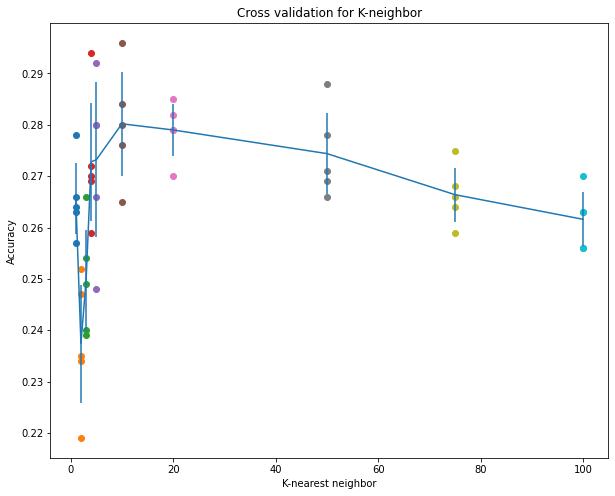

In [46]:
acc_mean = []
acc_std = []

for res in cross_val_results:
    k = res["k"]
    acc = res["cross_val_scores"]
    acc_mean.append(np.mean(acc))
    acc_std.append(np.std(acc))
    plt.scatter([k] * len(acc), acc)

plt.errorbar(k_choices, acc_mean, yerr=acc_std)
plt.title("Cross validation for K-neighbor")
plt.xlabel("K-nearest neighbor")
plt.ylabel("Accuracy")
plt.show()

In [47]:
cross_val_df = pd.DataFrame(data=cross_val_results)
cross_val_df.head()

,k,cross_val_scores
0,1,"[0.263, 0.257, 0.264, 0.278, 0.266]"
1,2,"[0.235, 0.219, 0.234, 0.247, 0.252]"
2,3,"[0.239, 0.249, 0.24, 0.266, 0.254]"
3,4,"[0.259, 0.27, 0.269, 0.294, 0.272]"
4,5,"[0.248, 0.266, 0.28, 0.292, 0.28]"


In [48]:
cross_val_df["mean"] = cross_val_df["cross_val_scores"].apply(lambda x: np.mean(x))
cross_val_df["std"] = cross_val_df["cross_val_scores"].apply(lambda x: np.std(x))
cross_val_df

,k,cross_val_scores,mean,std
0,1,"[0.263, 0.257, 0.264, 0.278, 0.266]",0.2656,0.006888
1,2,"[0.235, 0.219, 0.234, 0.247, 0.252]",0.2374,0.011500
2,3,"[0.239, 0.249, 0.24, 0.266, 0.254]",0.2496,0.009932
3,4,"[0.259, 0.27, 0.269, 0.294, 0.272]",0.2728,0.011513
4,5,"[0.248, 0.266, 0.28, 0.292, 0.28]",0.2732,0.015052
5,10,"[0.265, 0.296, 0.276, 0.284, 0.28]",0.2802,0.010127
6,20,"[0.27, 0.279, 0.279, 0.282, 0.285]",0.2790,0.005020
7,50,"[0.271, 0.288, 0.278, 0.269, 0.266]",0.2744,0.007864
8,75,"[0.264, 0.275, 0.259, 0.266, 0.268]",0.2664,0.005238
9,100,"[0.256, 0.27, 0.263, 0.256, 0.263]",0.2616,0.005238


In [49]:
cross_val_df.sort_values(by="mean").sort_values(by="std", ascending=False)

,k,cross_val_scores,mean,std
4,5,"[0.248, 0.266, 0.28, 0.292, 0.28]",0.2732,0.015052
3,4,"[0.259, 0.27, 0.269, 0.294, 0.272]",0.2728,0.011513
1,2,"[0.235, 0.219, 0.234, 0.247, 0.252]",0.2374,0.011500
5,10,"[0.265, 0.296, 0.276, 0.284, 0.28]",0.2802,0.010127
2,3,"[0.239, 0.249, 0.24, 0.266, 0.254]",0.2496,0.009932
7,50,"[0.271, 0.288, 0.278, 0.269, 0.266]",0.2744,0.007864
0,1,"[0.263, 0.257, 0.264, 0.278, 0.266]",0.2656,0.006888
9,100,"[0.256, 0.27, 0.263, 0.256, 0.263]",0.2616,0.005238
8,75,"[0.264, 0.275, 0.259, 0.266, 0.268]",0.2664,0.005238
6,20,"[0.27, 0.279, 0.279, 0.282, 0.285]",0.2790,0.005020


In [50]:
best_k = 5


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [51]:
best_knn = KNearestNeighbor()
best_knn.train(knn_X_train, knn_y_train)
print(f"Num loops: {0},accuracy = {accuracy(knn_y_test, best_knn.predict(knn_X_test, best_k, num_loops=0))}")
print(f"Num loops: {1},accuracy = {accuracy(knn_y_test, best_knn.predict(knn_X_test, best_k, num_loops=1))}")
print(f"Num loops: {2},accuracy = {accuracy(knn_y_test, best_knn.predict(knn_X_test, best_k, num_loops=2))}")

100%|███████████████████████████████████████| 500/500 [00:00<00:00, 2401.49it/s]


Num loops: 0,accuracy = 0.278


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 3631.14it/s]


Num loops: 1,accuracy = 0.278


100%|███████████████████████████████████████| 500/500 [00:00<00:00, 3622.92it/s]

Num loops: 2,accuracy = 0.278


1.11 Сделайте выводы по результатам 1 части задания.

* Точность k-ближайших соседей зависит от подсчета расстояния. Чем больше циклов, тем более точнее будет расстояние.

* Точность k-ближайших соседей зависит от выбора k. Чем больше k, тем точнее будет модель. Если взять слишком большое k, то модель переобучится и точность уменьшится.

## 2.  Классификация данных методом опорных векторов (SVM)

2.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

2.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

2.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву дынных и заполните ее 1.

In [ ]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

2.4 Реализуйте loss-функции в scripts/classifiers/linear_svm.py



In [ ]:

from scripts.classifiers.linear_svm import svm_loss_naive
import time


W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))


2.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [ ]:

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

from scripts.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)


loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

2.6 Сравните svm_loss_naive и svm_loss_vectorized реализации

In [ ]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

2.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

In [ ]:
from scripts.classifiers import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

In [ ]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

2.8 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [15]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

2.9 Сделайте выводы по второй части задания

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [52]:
num_train = 49000
num_val = 1000
num_test = 9000
num_dev = 1000

softmax_X_train = X_train[range(num_train)]
softmax_y_train = y_train[range(num_train)]

softmax_X_val = X_train[range(num_train, num_train + num_val)]
softmax_y_val = y_train[range(num_train, num_train + num_val)]

softmax_X_test = X_test[range(num_test)]
softmax_y_test = y_test[range(num_test)]

softmax_X_dev = X_test[range(num_test, num_test + num_val)]
softmax_y_dev = y_test[range(num_test, num_test + num_val)]
softmax_X_train = np.reshape(softmax_X_train, (softmax_X_train.shape[0], -1)).astype(np.float64)
softmax_y_train = np.reshape(softmax_y_train, (softmax_y_train.shape[0],))

softmax_X_val = np.reshape(softmax_X_val, (softmax_X_val.shape[0], -1)).astype(np.float64)
softmax_y_val = np.reshape(softmax_y_val, (softmax_y_val.shape[0],))

softmax_X_test = np.reshape(softmax_X_test, (softmax_X_test.shape[0], -1)).astype(np.float64)
softmax_y_test = np.reshape(softmax_y_test, (softmax_y_test.shape[0],))

softmax_X_dev = np.reshape(softmax_X_dev, (softmax_X_dev.shape[0], -1)).astype(np.float64)
softmax_y_dev = np.reshape(softmax_y_dev, (softmax_y_dev.shape[0],))
print(f"Тренировочная выборка: X={softmax_X_train.shape}, y={softmax_y_train.shape}")
print(f"Валидационная выборка: X={softmax_X_val.shape}, y={softmax_y_val.shape}")
print(f"Тестовая выборка: X={softmax_X_test.shape}, y={softmax_y_test.shape}")

Тренировочная выборка: X=(49000, 3072), y=(49000,)
Валидационная выборка: X=(1000, 3072), y=(1000,)
Тестовая выборка: X=(9000, 3072), y=(9000,)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347]


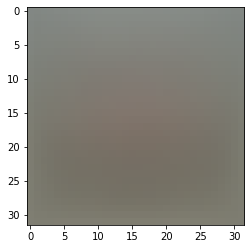

In [53]:
mean_image = np.mean(softmax_X_train, axis=0)
print(mean_image[:10])
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8'))
plt.show()

In [54]:
softmax_X_train -= mean_image
softmax_X_val -= mean_image
softmax_X_test -= mean_image
softmax_X_dev -= mean_image

softmax_X_train = np.hstack([softmax_X_train, np.ones((softmax_X_train.shape[0], 1))])
softmax_X_val = np.hstack([softmax_X_val, np.ones((softmax_X_val.shape[0], 1))])
softmax_X_test = np.hstack([softmax_X_test, np.ones((softmax_X_test.shape[0], 1))])
softmax_X_dev = np.hstack([softmax_X_dev, np.ones((softmax_X_dev.shape[0], 1))])

print(softmax_X_train.shape, softmax_X_val.shape, softmax_X_test.shape, softmax_X_dev.shape)

(49000, 3073) (1000, 3073) (9000, 3073) (1000, 3073)


3.4 Реализуйте функции в classifiers/softmax.py




In [58]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(3073, 10) * 0.0001
loss, grad = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 0.000000
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [59]:
loss, grad = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, softmax_X_dev, softmax_y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 5e1)
f = lambda w: softmax_loss_naive(w, softmax_X_dev, softmax_y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, relative error: nan
numerical: 0.000000 analytic: 0.000000, 

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [60]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, softmax_X_dev, softmax_y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, softmax_X_dev, softmax_y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 0.000000e+00 computed in 0.000617s
vectorized loss: 0.000000e+00 computed in 0.000357s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [67]:
from scripts.classifiers.linear_classifier import Softmax

softmax_classifier = Softmax()
softmax_classifier.train(softmax_X_train, softmax_y_train)
print(f"Accuracy: {accuracy(softmax_y_test, softmax_classifier.predict(softmax_X_test))}")

Accuracy: 0.09922222222222223


3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [68]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

data = []
for i, learning_rate in enumerate(learning_rates):
    print(f"Element {i + 1} from {len(learning_rates)} - {round((i + 1) / len(learning_rates), 2) * 100}%")
    for regularization_strength in regularization_strengths:
        cross_val_scores_ = cross_val_score(
            Softmax,
            softmax_X_train,
            softmax_y_train,
            train_estimator_params=dict(learning_rate=learning_rate, reg=regularization_strength),
        )
        data.append({
            "learning_rate": learning_rate,
            "regularization_strength": regularization_strength,
            "cross_val_scores": cross_val_scores_,
            "mean": np.mean(cross_val_scores_),
            "std": np.std(cross_val_scores_),
        })

Element 1 from 2 - 50.0%
Element 2 from 2 - 100.0%


In [70]:
softmax_cross_val_scores_df = pd.DataFrame(data=data)
softmax_cross_val_scores_df.sort_values(by="mean").sort_values(by="std", ascending=False)

,learning_rate,regularization_strength,cross_val_scores,mean,std
0,1.000000e-07,25000.0,"[0.10020408163265306, 0.0986734693877551, 0.09...",0.100265,0.001376
1,1.000000e-07,50000.0,"[0.10020408163265306, 0.0986734693877551, 0.09...",0.100265,0.001376
2,5.000000e-05,25000.0,"[0.10020408163265306, 0.0986734693877551, 0.09...",0.100265,0.001376
3,5.000000e-05,50000.0,"[0.10020408163265306, 0.0986734693877551, 0.09...",0.100265,0.001376


In [71]:
best_softmax_classifier = Softmax()
best_softmax_classifier.train(softmax_X_train, softmax_y_train, learning_rate=5e-5, reg=2.5e4)
print(f"Accuracy: {accuracy(softmax_y_test, best_softmax_classifier.predict(softmax_X_test))}")

Accuracy: 0.09922222222222223


3.10 Сделайте выводы по третьей части задания

* В зависимости от регуляризации и скорости обучения зависит точность SVM. При определенной комбинации можно добиться минимальной ошибки.

* SVM классификатор точнее Softmax.